170500096/170498071 [==============================] - 3s 0us/step

----- MLP to image classificatino for CIFAR-10 dataset -----

Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               786688    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 855,050
Trainable params: 855,050
Non-trainable params: 0
_________________________________________________________________
196/196 - 5s - loss: 2.1088 - accuracy: 0.2455 - val_loss: 1.9614 - val_acc

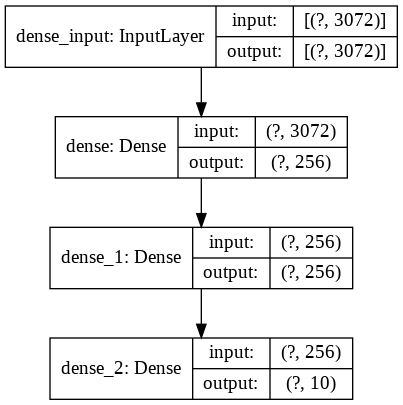

In [1]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist,cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import SGD
import gzip
import six.moves.cPickle as pickle
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from numpy import asarray
from numpy import unique
from numpy import argmax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
import sys


class Homework2:
    def __init__(self):
        self.mnistdataset = mnist.load_data()
        self.cifar10dataset = cifar10.load_data()


    def cnn_mnist(self,batch_size=32, epochs=5):
        print('\n----- CNN for MNIST dataset -----\n')
        
        # load dataset
        (x_train, y_train), (x_test, y_test) = self.mnistdataset 
        # one hot encode target values
        y_train = to_categorical(y_train)
        y_test = to_categorical(y_test)
        # reshape data to have a single channel
        x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
        x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
        # determine the shape of the input images
        in_shape = x_train.shape[1:]
        # determine the number of classes
        n_classes = len(unique(y_train))
        print(in_shape, n_classes)
        # normalize pixel values
        x_train = x_train.astype('float32') / 255.0
        x_test = x_test.astype('float32') / 255.0
        # define model

        print('Training data shape : ', x_train.shape, y_train.shape)
        print('Testing data shape : ', x_test.shape, y_test.shape)
        # Find the unique numbers from the train labels
        classes = np.unique(y_train)
        classes_num = len(classes)
        print('Total number of outputs : ', classes_num)
        print('Output classes : ', classes)


        model = Sequential()
        model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=in_shape))
        model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(MaxPooling2D((2, 2)))
        model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(MaxPooling2D((2, 2)))
        model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(MaxPooling2D((2, 2)))
        model.add(Flatten())
        model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
        model.add(Dense(10, activation='softmax'))
        # compile model
        opt = SGD(lr=0.001, momentum=0.9)
        model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

        # define loss and optimizer
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        # fit the model
        history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), verbose=2)
        # evaluate the model
        [test_loss, test_acc] = model.evaluate(x_test, y_test)
        print("\n\nEvaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

        # make a prediction
        image = x_train[0]
        yhat = model.predict(asarray([image]))
        print('Predicted: class=%d' % argmax(yhat))

        return model,history,test_loss, test_acc




    def cnn_cifar10(self,batch_size=781, epochs=5,verbose=2):
        print('\n----- CNN for CIFAR-10 dataset -----\n')
        
        # load dataset
        (x_train, y_train), (x_test, y_test) = self.cifar10dataset 
        # one hot encode target values
        y_train = to_categorical(y_train)
        y_test = to_categorical(y_test)
        # convert from integers to floats
        x_train = x_train.astype('float32')
        x_test = x_test.astype('float32')
        # normalize to range 0-1
        x_train = x_train / 255.0
        x_test = x_test / 255.0
        # return normalized images

        print('Training data shape : ', x_train.shape, y_train.shape)
        print('Testing data shape : ', x_test.shape, y_test.shape)
        # Find the unique numbers from the train labels
        classes = np.unique(y_train)
        classes_num = len(classes)
        print('Total number of outputs : ', classes_num)
        print('Output classes : ', classes)

        model = Sequential()
        model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
        model.add(BatchNormalization())
        model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D((2, 2)))
        model.add(Dropout(0.2))
        model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(BatchNormalization())
        model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D((2, 2)))
        model.add(Dropout(0.3))
        model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(BatchNormalization())
        model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D((2, 2)))
        model.add(Dropout(0.4))
        model.add(Flatten())
        model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        model.add(Dense(10, activation='softmax'))
        # compile model
        opt = SGD(lr=0.001, momentum=0.9)
        model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
       
        # create data generator
        datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
        # prepare iterator
        it_train = datagen.flow(x_train, y_train, batch_size=64) #781
        # fit model
        steps = int(x_train.shape[0] / 64)
        history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=epochs, validation_data=(x_test, y_test), verbose=verbose)

        # evaluate the model
        [test_loss, test_acc] = model.evaluate(x_test, y_test)
        print("\n\nEvaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

        # make a prediction
        image = x_train[0]
        yhat = model.predict(asarray([image]))
        print('Predicted: class=%d' % argmax(yhat))

        model.summary()
        return model,history,test_loss, test_acc




    def mlp_mnist(self,neuronlayer1=512,neuronlayer2=512,batch_size=256, epochs=5,verbose=2):
        print('\n----- MLP image classifier for MNIST dataset -----\n')
        
        (train_images, train_labels), (test_images, test_labels) = self.mnistdataset   
        print('Training data shape : ', train_images.shape, train_labels.shape)
        print('Testing data shape : ', test_images.shape, test_labels.shape)
        # Find the unique numbers from the train labels
        classes = np.unique(train_labels)
        classes_num = len(classes)
        print('Total number of outputs : ', classes_num)
        print('Output classes : ', classes)

        # Change from matrix to array of dimension 28x28 to array of dimension 784
        dim_data = np.prod(train_images.shape[1:])
        train_data = train_images.reshape(train_images.shape[0], dim_data)
        test_data = test_images.reshape(test_images.shape[0], dim_data)
        # Change to float datatype
        train_data = train_data.astype('float32')
        test_data = test_data.astype('float32')
        # Normalization of pixel values (to [0-1] range)
        train_data /= 255
        test_data /= 255

        # Change the labels from integer to categorical data
        train_labels_one_hot = to_categorical(train_labels)
        test_labels_one_hot = to_categorical(test_labels)

        model = Sequential()
        model.add(Dense(neuronlayer1, activation='relu', input_shape=(dim_data,)))
        model.add(Dense(neuronlayer2, activation='relu'))
        model.add(Dense(classes_num, activation='softmax'))

        opt = SGD(lr=0.001, momentum=0.9)
        model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

        history = model.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=verbose, 
                       validation_data=(test_data, test_labels_one_hot))

        [test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
        print("\n\nEvaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))
        model.summary()
        return model,history,test_loss, test_acc


    def mlp_cifar10(self, neuronlayer1=256,neuronlayer2=256, batch_size=256, epochs=5):
        print('\n----- MLP to image classificatino for CIFAR-10 dataset -----\n')
        
        (train_images, train_labels), (test_images, test_labels) = self.cifar10dataset   
        print('Training data shape : ', train_images.shape, train_labels.shape)
        print('Testing data shape : ', test_images.shape, test_labels.shape)
        # Find the unique numbers from the train labels
        classes = np.unique(train_labels)
        classes_num = len(classes)
        print('Total number of outputs : ', classes_num)
        print('Output classes : ', classes)
        # Change from matrix to array of dimension 32*32*3 to array of dimension 3072
        dim_data = np.prod(train_images.shape[1:]) #3072
        train_data = train_images.reshape(train_images.shape[0], dim_data)
        test_data = test_images.reshape(test_images.shape[0], dim_data)
        # Change to float datatype
        train_data = train_data.astype('float32')
        test_data = test_data.astype('float32')

        # Normalization of pixel values (to [0-1] range)
        train_data /= 255
        test_data /= 255

        # Change the labels from integer to categorical data
        train_labels_one_hot = to_categorical(train_labels, num_classes=10)
        test_labels_one_hot = to_categorical(test_labels, num_classes=10)

        input_dim = dim_data
        model = Sequential()
        model.add(Dense(neuronlayer1, activation='relu', input_dim=input_dim))
        model.add(Dense(neuronlayer2, activation='relu'))
        model.add(Dense(10, activation='softmax'))
        model.summary()

        # compile the model
        opt = SGD(lr=0.001, momentum=0.9)
        model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

        history = model.fit(train_data, train_labels_one_hot, epochs=epochs, batch_size=batch_size, verbose=2, validation_data=(test_data, test_labels_one_hot))

        [test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
        print("\n\nEvaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))
       
        return model,history,test_loss, test_acc   


    def softmax_regression_mnist(self,batch_size=256, epochs=5):
        print('\n----- Softmax Regression to image classificatino for MNIST dataset -----\n')
        
        (train_images, train_labels), (test_images, test_labels) = self.mnistdataset   
        print('Training data shape : ', train_images.shape, train_labels.shape)
        print('Testing data shape : ', test_images.shape, test_labels.shape)
        # Find the unique numbers from the train labels
        classes = np.unique(train_labels)
        classes_num = len(classes)
        print('Total number of outputs : ', classes_num)
        print('Output classes : ', classes)
        # Change from matrix to array of dimension 28x28 to array of dimension 784
        dim_data = np.prod(train_images.shape[1:])
        train_data = train_images.reshape(train_images.shape[0], dim_data)
        test_data = test_images.reshape(test_images.shape[0], dim_data)
        # Change to float datatype
        train_data = train_data.astype('float32')
        test_data = test_data.astype('float32')
        # Normalization of pixel values (to [0-1] range)
        train_data /= 255
        test_data /= 255

        # Change the labels from integer to categorical data
        train_labels_one_hot = to_categorical(train_labels)
        test_labels_one_hot = to_categorical(test_labels)

        print(train_data,test_data,train_labels_one_hot,test_labels_one_hot)
        input_dim = 784
        model = Sequential()
        model.add(Dense(10, input_dim=input_dim, activation='softmax'))
        model.summary()

        # compile the model
        opt = SGD(lr=0.001, momentum=0.9)
        model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

        history = model.fit(train_data, train_labels_one_hot,
                            batch_size=batch_size, epochs=epochs,
                            verbose=2, validation_data=(test_data, test_labels_one_hot))
        [test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
        print("\n\nEvaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))
       
        return model,history,test_loss, test_acc        

    def softmax_regression_cifar10(self,batch_size=256, epochs=5):
        print('\n----- Softmax Regression to image classificatino for CIFAR-10 dataset -----\n')
        
        (train_images, train_labels), (test_images, test_labels) = self.cifar10dataset   
        print('Training data shape : ', train_images.shape, train_labels.shape)
        print('Testing data shape : ', test_images.shape, test_labels.shape)
        # Find the unique numbers from the train labels
        classes = np.unique(train_labels)
        classes_num = len(classes)
        print('Total number of outputs : ', classes_num)
        print('Output classes : ', classes)
        # Change from matrix to array of dimension 32*32*3 to array of dimension 3072
        dim_data = np.prod(train_images.shape[1:]) #3072
        train_data = train_images.reshape(train_images.shape[0], dim_data)
        test_data = test_images.reshape(test_images.shape[0], dim_data)
        # Change to float datatype
        train_data = train_data.astype('float32')
        test_data = test_data.astype('float32')

        # Normalization of pixel values (to [0-1] range)
        train_data /= 255
        test_data /= 255

        # Change the labels from integer to categorical data
        train_labels_one_hot = to_categorical(train_labels, num_classes=10)
        test_labels_one_hot = to_categorical(test_labels, num_classes=10)

        input_dim = dim_data
        model = Sequential()
        model.add(Dense(10, input_dim=input_dim, activation='softmax')) #softmax regression
        model.summary()

        # compile the model
        opt = SGD(lr=0.001, momentum=0.9)
        model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

        history = model.fit(train_data, train_labels_one_hot,
                            batch_size=batch_size, epochs=epochs,
                            verbose=2, validation_data=(test_data, test_labels_one_hot))

        [test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
        print("\n\nEvaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))
       
        return model,history,test_loss, test_acc        
     

    def plot_loss_and_accuracy(self,history,filename,epochs=20):  
        #Plot the Loss Curves
        plt.figure(figsize=[8,6])
        plt.plot(history.history['loss'],'tab:blue',linewidth=3.0)
        plt.plot(history.history['val_loss'],'tab:red',linewidth=3.0)
        plt.legend(['Training loss', 'Validation (Testing) Loss'],fontsize=18)
        plt.xlabel('Epochs ',fontsize=16)
        plt.ylabel('Loss',fontsize=16)
        plt.title('Cross Entropy Loss Curves',fontsize=16)
        #plt.xticks(range(epochs))
        plt.ylim(0,5)
        plt.savefig(filename+'_Loss_Curves_fe.png')
        #Plot the Accuracy Curves
        plt.figure(figsize=[8,6]) 
        plt.plot(history.history['accuracy'],'tab:blue',linewidth=3.0) 
        plt.plot(history.history['val_accuracy'],'tab:red',linewidth=3.0) 
        plt.legend(['Training Accuracy', 'Validation (Testing) Accuracy'],fontsize=18) 
        plt.xlabel('Epochs ',fontsize=16) 
        plt.ylabel('Accuracy',fontsize=16) 
        plt.title('Accuracy Curves',fontsize=16)
        #plt.xticks(range(epochs))
        plt.ylim(0,1)
        plt.savefig(filename+'_Accuracy_Curves_fe.png')


    def saveExperiment(self,filename,modelname, test_loss, test_acc ):
        f = open(filename+".csv", 'a') 
        f.write(str(modelname)+","+str(test_loss)+","+str(test_acc))
        f.close()
    
        
    def model_information(self,model):
        # print(model.metrics_names)
        # model.summary()
        from tensorflow.keras.utils import plot_model
        plot_model(model, 'model.png', show_shapes=True)
        



epochs=1


# H=Homework2()
# results=H.cnn_cifar10(epochs=epochs)
#H.plot_loss_and_accuracy(results[1], "cnn_cifar10" ,epochs=epochs)
#H.saveExperiment("resuts_homework2","cnn_cifar10",results[2],results[3])


# H=Homework2()
# results=H.cnn_mnist(epochs=epochs)
# # H.plot_loss_and_accuracy(results[1], "cnn_mnist" ,epochs=epochs)
# # H.saveExperiment("resuts_homework2","cnn_mnist",results[2],results[3])



H=Homework2()
results=H.mlp_cifar10(epochs=epochs)
# H.plot_loss_and_accuracy(results[1], "mlp_cifar10" ,epochs=epochs)
#H.saveExperiment("resuts_homework2","mlp_cifar10",results[2],results[3])
print("############## Visualization MLP CIFAR-10 Model##############")
from tensorflow.keras.utils import plot_model
plot_model(results[0], 'model.png', show_shapes=True)




# H=Homework2()
# results=H.mlp_mnist(epochs=epochs)
# # H.plot_loss_and_accuracy(results[1], "mlp_mnist" ,epochs=epochs)
# # H.saveExperiment("resuts_homework2","mlp_mnist",results[2],results[3])
# # import pandas as pd
# # pd.DataFrame.from_dict(results[1].history).to_csv('history_mlp_mnist.csv',index=False)
# print("############## Visualization MLP mnist Model##############")
# from tensorflow.keras.utils import plot_model
# plot_model(results[0], 'model.png', show_shapes=True)


# H=Homework2()
# results=H.softmax_regression_mnist(epochs=epochs)
# # H.plot_loss_and_accuracy(results[1], "softmax_regression_mnist" ,epochs=epochs)
# #H.saveExperiment("resuts_homework2","softmax_regression_mnist",results[2],results[3])
# print("############## Visualization softmax regression mnist Model##############")
# from tensorflow.keras.utils import plot_model
# plot_model(results[0], 'model.png', show_shapes=True)


# H=Homework2()
# results=H.softmax_regression_cifar10(epochs=epochs)
# # H.plot_loss_and_accuracy(results[1], "softmax_regression_cifar10" ,epochs=epochs)
# #H.saveExperiment("resuts_homework2","softmax_regression_cifar10",results[2],results[3])
# print("############## Visualization softmax regression cifar10 Model##############")
# from tensorflow.keras.utils import plot_model
# plot_model(results[0], 'model.png', show_shapes=True)












----- MLP image classifier for MNIST dataset -----

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]
235/235 - 5s - loss: 1.6206 - accuracy: 0.6304 - val_loss: 0.9439 - val_accuracy: 0.8254
313/313 [==============================] - 1s 2ms/step - loss: 0.9439 - accuracy: 0.8254


Evaluation result on Test Data : Loss = 0.943861722946167, accuracy = 0.8253999948501587
Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_50 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_51 (Dense)             (None, 10)                5130      
Total params: 669,706
Traina

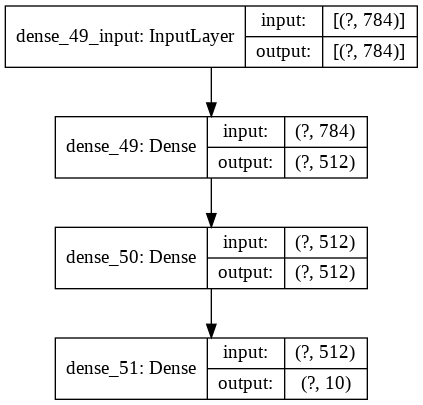

In [ ]:

H=Homework2()
results=H.mlp_mnist(epochs=epochs)
# H.plot_loss_and_accuracy(results[1], "mlp_mnist" ,epochs=epochs)
# H.saveExperiment("resuts_homework2","mlp_mnist",results[2],results[3])
# import pandas as pd
# pd.DataFrame.from_dict(results[1].history).to_csv('history_mlp_mnist.csv',index=False)
print("############## Visualization MLP mnist Model##############")
from tensorflow.keras.utils import plot_model
plot_model(results[0], 'model.png', show_shapes=True)







----- Softmax Regression to image classificatino for MNIST dataset -----

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]] [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape      

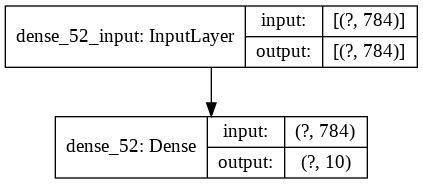

In [ ]:

H=Homework2()
results=H.softmax_regression_mnist(epochs=epochs)
# H.plot_loss_and_accuracy(results[1], "softmax_regression_mnist" ,epochs=epochs)
#H.saveExperiment("resuts_homework2","softmax_regression_mnist",results[2],results[3])
print("############## Visualization softmax regression mnist Model##############")
from tensorflow.keras.utils import plot_model
plot_model(results[0], 'model.png', show_shapes=True)







----- Softmax Regression to image classificatino for CIFAR-10 dataset -----

Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]
Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________
196/196 - 1s - loss: 2.0959 - accuracy: 0.2430 - val_loss: 1.9668 - val_accuracy: 0.3026
313/313 [==============================] - 0s 1ms/step - loss: 1.9668 - accuracy: 0.3026


Evaluation result on Test Data : Loss = 1.966781497001648, accuracy = 0.3025999963283539
############## Visualization softmax regression cifar10 Model##############


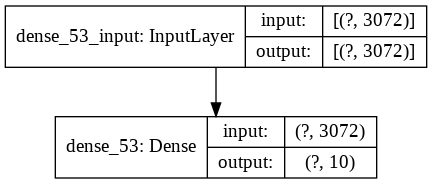

In [ ]:
H=Homework2()
results=H.softmax_regression_cifar10(epochs=epochs)
# H.plot_loss_and_accuracy(results[1], "softmax_regression_cifar10" ,epochs=epochs)
#H.saveExperiment("resuts_homework2","softmax_regression_cifar10",results[2],results[3])
print("############## Visualization softmax regression cifar10 Model##############")
from tensorflow.keras.utils import plot_model
plot_model(results[0], 'model.png', show_shapes=True)

